Data Preprocessing

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df  = pd.read_csv('/content/spam.tsv', sep = '\t')

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isnull().sum()

,0
label,0
message,0
length,0
punct,0


In [11]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


In [12]:
(df['label'].value_counts() / len(df))*100

,count
label,
ham,86.593683
spam,13.406317


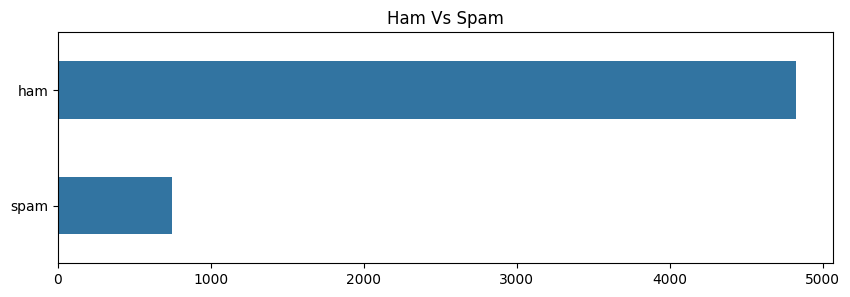

In [194]:
val = list(df['label'].value_counts())
labels = list(df['label'].value_counts().index)
fig = plt.figure(figsize = (10, 3))
sns.barplot(x=val, y=labels, width= 0.5)
plt.title('Ham Vs Spam')

plt.show()

- Ham Vs Spam data looks immbalanced.

<ipython-input-200-279c56f8d016>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_Class = pd.value_counts(df.label, sort = True)
<ipython-input-200-279c56f8d016>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sizes = [count_Class[0], count_Class[1]]


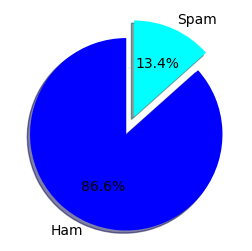

In [200]:
fig = plt.figure(figsize = (3,3))
count_Class = pd.value_counts(df.label, sort = True)
sizes = [count_Class[0], count_Class[1]]
explode = (0.1, 0.1)
labels = ['Ham', 'Spam']
plt.pie(sizes, explode = explode, labels = labels, colors=['blue', 'aqua'],
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [13]:
ham = df[df['label']=='ham']
spam = df[df['label']=='spam']

In [15]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [16]:
ham = ham.sample(spam.shape[0])

In [17]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [22]:
data = pd.concat([ham, spam], ignore_index = True)

In [23]:
data.head()

,label,message,length,punct
0,ham,Where u been hiding stranger?,29,1
1,ham,This pen thing is beyond a joke. Wont a Biro d...,97,5
2,ham,* Was really good to see you the other day dud...,69,3
3,ham,Sounds like something that someone testing me ...,56,0
4,ham,Yeah he got in at 2 and was v apologetic. n ha...,189,7


In [24]:
data['label'].value_counts()

,count
label,
ham,747
spam,747


- Now, ham vs spam looks balanced to train a model

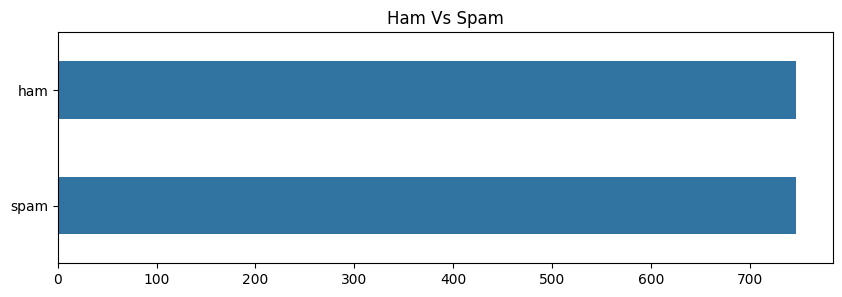

In [60]:
val = list(data['label'].value_counts())
labels = list(data['label'].value_counts().index)
fig = plt.figure(figsize = (10, 3))
sns.barplot(x=val, y=labels, width= 0.5)
plt.title('Ham Vs Spam')
plt.show()

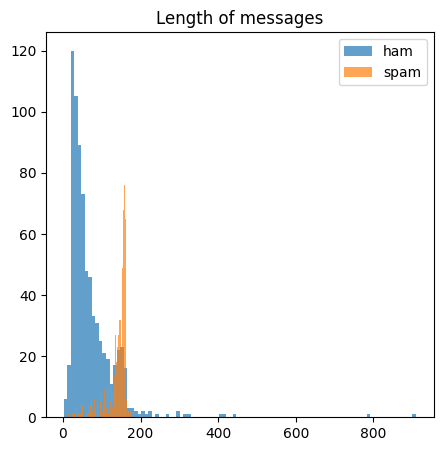

In [59]:
fig = plt.figure(figsize = (5,5))
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.legend(['ham', 'spam'])
plt.title('Length of messages')
plt.show()

This graph gives us visual representation of length of the ham message is lengthier compared to spam messages.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!




				 HAM WORDS


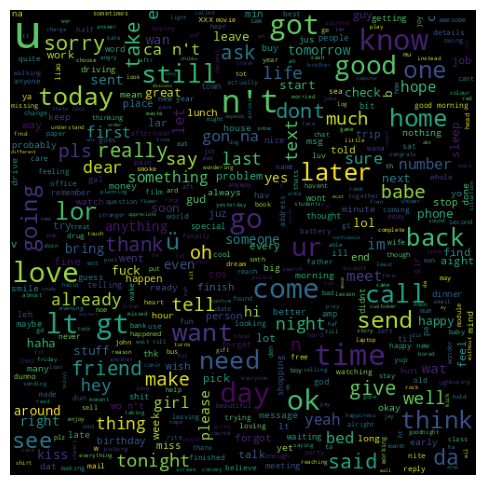

				 SPAM WORDS


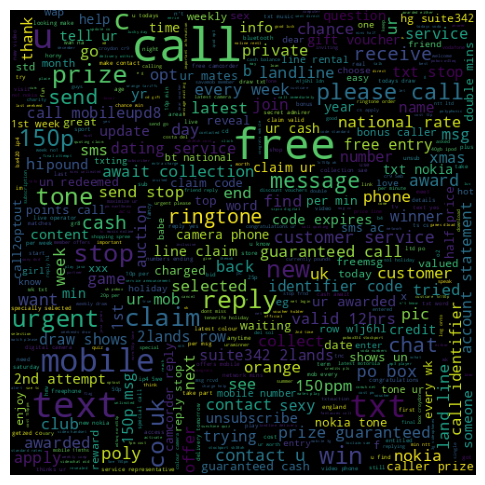

In [79]:
from wordcloud import WordCloud # tag cloud
from wordcloud import STOPWORDS # stop words
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# Stopwords (noise words)
stopwords = STOPWORDS
stopwords = list(stopwords)
STOPWORDS = nltk.corpus.stopwords.words('english')
stopwords = stopwords + STOPWORDS

ham_dataset = data[data.label == 'ham']
spam_dataset = data[data.label == 'spam']
ham_words = ' '
spam_words = ' '

for words in ham_dataset.message:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        ham_words = ham_words + word + " "
for words in spam_dataset.message:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        spam_words = spam_words + word + " "

def gen_wordcloud(wordcloud):
    plt.figure(figsize = (5,5))
    plt.imshow(wordcloud)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()

print("\n")
print("\t\t\t\t HAM WORDS")
wordcloud = WordCloud(background_color = 'black', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(ham_words)
gen_wordcloud(wordcloud)

print("\t\t\t\t SPAM WORDS")
wordcloud = WordCloud(background_color = 'black', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(spam_words)
gen_wordcloud(wordcloud)


- Train data and Test data

In [64]:
from sklearn.model_selection import train_test_split

In [175]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3, random_state = 42)

In [176]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((1045,), (1045,)), ((449,), (449,)))

Building the Model - Random Forest

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [177]:
classifier = Pipeline([('tfidf',TfidfVectorizer()),('classifier',RandomForestClassifier(n_estimators=10))])


In [178]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

- Predict the results

In [179]:
y_pred = classifier.predict(X_test)


In [180]:
result = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
result.head()

,y_test,y_pred
949,spam,spam
900,spam,spam
1339,spam,spam
983,spam,ham
958,spam,spam


In [181]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in result.columns:
  result[i] = le.fit_transform(result[i])
result.head()

,y_test,y_pred
949,1,1
900,1,1
1339,1,1
983,1,0
958,1,1


- Classification Metrics

In [182]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [183]:
confusion_matrix(result['y_test'], result['y_pred'])

array([[216,   1],
       [ 28, 204]])

In [184]:
y_prob = classifier.predict_proba(X_test)[:,1]

In [185]:
fpr, tpr, thresholds = roc_curve(result['y_test'],y_prob)
roc_auc = auc(fpr, tpr)
print("The ROC Accuracy is {}".format(roc_auc))

The ROC Accuracy is 0.9820832671221993


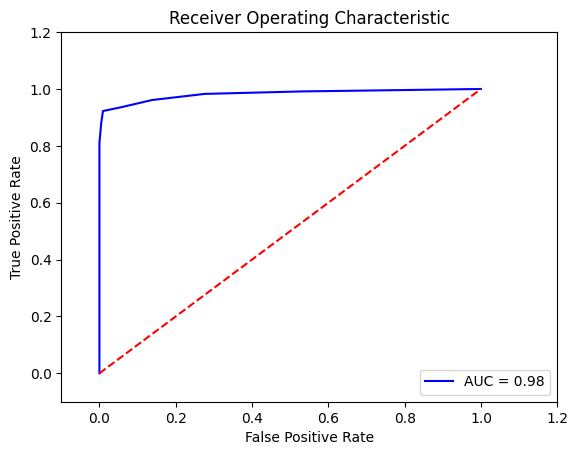

In [186]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [187]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.89      1.00      0.94       217
        spam       1.00      0.88      0.93       232

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



- Building the Model (SVM)

In [130]:
from sklearn.svm import SVC

In [148]:
svm = Pipeline([('tfidf',TfidfVectorizer()),('svm',SVC(C = 100, gamma = 'auto'))])

In [149]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('svm', SVC(C=100, gamma='auto'))])

In [150]:
y_pred = svm.predict(X_test)

In [151]:
confusion_matrix(results['y_test'], results['y_pred'])

array([[216,   1],
       [ 29, 203]])

In [152]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.79      1.00      0.89       217
        spam       1.00      0.76      0.86       232

    accuracy                           0.88       449
   macro avg       0.90      0.88      0.87       449
weighted avg       0.90      0.88      0.87       449



In [153]:
result = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
result.head()
for i in result.columns:
  result[i] = le.fit_transform(result[i])
result.head()

,y_test,y_pred
949,1,1
900,1,1
1339,1,1
983,1,0
958,1,1


In [154]:
y_prob = classifier.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(result['y_test'],y_prob)
roc_auc = auc(fpr, tpr)
print("The ROC Accuracy is {}".format(roc_auc))

The ROC Accuracy is 0.979709597965994


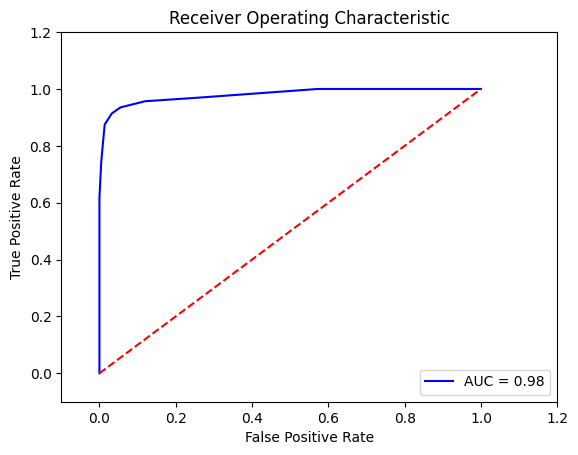

In [155]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- Real-time test

In [188]:
test1 = ['Hello, You are so beautiful']
test2 = ['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question']
test3 = ['That was aweful!!']
test4 = ['Congratulations, You won a lottery ticket $1 Million ! To claim call on 446677']


In [189]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))
print(classifier.predict(test4))

['ham']
['spam']
['ham']
['spam']


In [172]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))
print(svm.predict(test4))

['ham']
['spam']
['ham']
['spam']
